# Assignment 2 - Supervised Machine Learning Fundamentals

## *Nick Carroll*
Netid: nc230

Note: this assignment falls under collaboration Mode 2: Individual Assignment – Collaboration Permitted. Please refer to the syllabus for additional information.

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), and is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

Total points in the assignment add up to 90; an additional 10 points are allocated to presentation quality.

## Learning Objectives:
By successfully completing this assignment you will be able to...
- Explain the bias-variance tradeoff of supervised machine learning and the impact of model flexibility on algorithm performance
- Perform supervised machine learning training and performance evaluation
- Implement a k-nearest neighbors machine learning algorithm from scratch in a style similar to that of popular machine learning tools like `scikit-learn`
- Describe how KNN classification works, the method's reliance on distance measurements, and the impact of higher dimensionality on computational speed
- Apply regression (linear regression) and classification (KNN) supervised learning techniques to data and evaluate the performance of those methods
- Construct simple feature transformations for improving model fit in linear models
- Fit a `scikit-learn` supervised learning technique to training data and make predictions using it

In [2]:
# MAC USERS TAKE NOTE:
# For clearer plots in Jupyter notebooks on macs, run the following line of code:
# %config InlineBackend.figure_format = 'retina'

---

# Conceptual Questions on Supervised Learning

## 1
**[4 points]**
For each part below, indicate whether we would generally expect the performance of a flexible statistical learning method to be *better* or *worse* than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

1. If the sample size is extremely large, but the number of predictors is small, I would expect that a more flexible model will be much more likely to overfit to the large number of samples (i.e. over-fitting a classification around a point of one class that is surrounded by points of another class) and therefore perform worse than an inflexible model.
2. If the number of predictors is extremely large, and the number of observations is small, then a more flexible model will be more likely to overfit to the small number of observations, and there is more likely to be a noise from predictors that may not be statistically significant (i.e. connecting three points into a curve when it is actually a linear relationship), and therefore a more flexible model would likely perform worse than an inflexible model.
3. If the relationship between the predictors and the response is highly non-linear than a more flexible model will likely perform better than an inflexible model, because an inflexible model will not be able to account for the non-linearity.
4. If the variance of the error terms is extremely high, then an inflexible model will seek to account for that variance, even if there is simply a lot of noise in the data than cannot be accounted for; therefore, a more flexible model will likely perform worse than an inflexible model.

---

## 2
**[6 points]** For each of the following, (i) explain if each scenario is a classification or regression problem AND why, (ii) indicate whether we are most interested in inference or prediction for that problem AND why, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**


**(a)** To understand which factors affect CEO salary, a regression would be required because the CEO salary is a continuous variable.  In this scenario, we would be most interested in inference, since we are trying to understand the factors that affect it, and not interested in predicting the actual salary itself.  In this scenario, the sample size is the 500 firms, and the predictors are profit, number of employees, and industry (3 predictors).

**(b)** To understand whether a new product launch will be a success or a failure, we will need a classification problem, because the output is being classified as a binary output: success or failure.  In this scenario, we would be most interested in prediction, because we want to know what will be the outcome of the product which has not launched yet.  In this scenario, the sample size is the 20 similar products, and the predictors are the price charged, marketing budget, competition price, and ten other variables (13 predictors in total).

**(c)** To predict the % change in the US dollar, we will need a regression, because the percent change is a continuous variable.  In this scneario, we would be most interested in prediction, because we are trying to predict the % change in the US dollar in the future.  In this scenario, the sample size is the 52 weeks of weekly data, and the predictors are the % change in the US market, % change in the British market, % change in the German market (3 predictors).

---

# Practical Questions

## 3
**[6 points] Classification using KNN**. The table below provides a training dataset containing six observations (a.k.a. samples) ($n=6$) each with three predictors (a.k.a. features) ($p=3$), and one qualitative response variable (a.k.a. target).

*Table 1. Training dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use the above training dataset to make a prediction, $\hat{y}$, for an unlabeled test data observation where $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started. *Note: coding is only required for part (a), for (b)-(d) please provide your reasoning based on your answer to part (a)*.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction, $\hat{y}$, when $K=1$ for the test point? Why?

**(c)** What is our prediction, $\hat{y}$, when $K=3$ for the test point? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [3]:
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
              
y = np.array(['r','r','r','b','b','r'])

**ANSWER**:

**(a)** Below is a table showing the Euclidean distances for each observation along with its y-value.

In [6]:
import pandas as pd

# Get rid of Warnings
%%capture --no-stdout

# Calculate euclidean distances
test = np.array([[0, 0, 0]])
obs = np.arange(1, 7)
distances = np.diagonal(np.matmul((X - test), (X - test).T))

# Create a table of distances
table = pd.DataFrame(
    np.vstack(
        (obs, distances, y)).T, 
        columns=[
                     'Observations', 
                     'Distances', 
                     'y']).set_index('Observations').replace(
                        {'r': 'Red', 'b': 'Blue'})

# Convert distances to integers
table.loc[:, 'Distances'] = table.loc[:, 'Distances'].astype('int')

/tmp/ipykernel_10091/4231343299.py:22: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  table.loc[:, 'Distances'] = table.loc[:, 'Distances'].astype('int')


In [7]:
# Show Table
table

,Distances,y
Observations,,
1,9,Red
2,4,Red
3,10,Red
4,5,Blue
5,2,Blue
6,3,Red


**(b)**

In [8]:
print(
    f"""The KNN prediction for the test point when K = 1 is \
{table.loc[table.loc[:, 'Distances'] == table.loc[:, 'Distances'].min(), 'y'].values[0]}.""")

The KNN prediction for the test point when K = 1 is Blue.


**(c)**

In [9]:
print(
    f"""The KNN prediction for the test point when K = 3 is \
{table.sort_values(
    'Distances').iloc[:3].loc[:, 'y'].value_counts().loc[table.sort_values(
        'Distances').iloc[:3].loc[:, 'y'].value_counts() == table.sort_values(
            'Distances').iloc[:3].loc[:, 'y'].value_counts().max()].index.values[0]}.""")


The KNN prediction for the test point when K = 3 is Red.


**(d)** If the Bayes decision boundary is highly non-linear, we would expect the best value of K to be small.

---

## 4
**[18 points] Build your own classification algorithm**.

**(a)** Build a working version of a binary KNN classifier using the skeleton code below. We'll use the `sklearn` convention that a supervised learning algorithm has the methods `fit` which trains your algorithm (for KNN that means storing the data) and `predict` which identifies the K nearest neighbors and determines the most common class among those K neighbors. *Note: Most classification algorithms typically also have a method `predict_proba` which outputs the confidence score of each prediction, but we will explore that in a later assignment.*

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional dataset ($p = 2$ features/predictors) and a higher dimensional dataset ($p = 100$ features/predictors). For each of these datasets there are $n=1000$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each of those trained models. Calculate the time it takes each model to make the predictions and the overall accuracy of those predictions for each corresponding set of test data - state each.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare to your implementation?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow? In what cases in practice might slow testing (inference) be more problematic than slow training?

In [10]:
# # Skeleton code for part (a) to write your own kNN classifier

# class Knn:
# # k-Nearest Neighbor class object for classification training and testing
#     def __init__(self):
        
#     def fit(self, x, y):
#         # Save the training data to properties of this class
        
#     def predict(self, x, k):
#         y_hat = [] # Variable to store the estimated class label for 
#         # Calculate the distance from each vector in x to the training data
        
#         # Return the estimated targets
#         return y_hat

# # Metric of overall classification accuracy
# #  (a more general function, sklearn.metrics.accuracy_score, is also available)
# def accuracy(y,y_hat):
#     nvalues = len(y)
#     accuracy = sum(y == y_hat) / nvalues
#     return accuracy

**ANSWER**:

**(a)** Below is the code for my KNN classifier.

In [11]:
class Knn:
    # k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        self.X = []
        self.Y = []

    def fit(self, x, y):
        self.X = x
        self.Y = y

    def predict(self, x, k):
        y_hat = []  # Variable to store the estimated class label for
        # Calculate the distance from each vector in x to the training data

        X_3d = np.stack(x.shape[0] * [self.X.to_numpy()])

        x_3d = np.transpose(
            np.stack(
                self.X.shape[0] * [x.to_numpy()]),
            axes=[1, 0, 2])

        distances = pd.DataFrame(
            np.hstack((np.sum(
                np.multiply(
                    (X_3d - x_3d),
                    (X_3d - x_3d)),
                axis=2).T,
                self.Y)))

        y_hat = np.asarray(
            [distances.sort_values(i).iloc[:k, -1].value_counts().loc[
                distances.sort_values(i).iloc[:k, -1].value_counts() == distances.sort_values(
                    i).iloc[:k, -1].value_counts().max()].index.values[0] for i in range(x.shape[0])])

        # Return the estimated targets
        return y_hat

# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)


def accuracy(y, y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy


**(b)** Loading datasets

In [12]:
# Loading Data
A2_X_test_high = pd.read_csv('data/A2_X_test_high.csv')
A2_X_test_low = pd.read_csv('data/A2_X_test_low.csv')
A2_X_train_high = pd.read_csv('data/A2_X_train_high.csv')
A2_X_train_low = pd.read_csv('data/A2_X_train_low.csv')
A2_y_test_high = pd.read_csv('data/A2_y_test_high.csv')
A2_y_test_low = pd.read_csv('data/A2_y_test_low.csv')
A2_y_train_high = pd.read_csv('data/A2_y_train_high.csv')
A2_y_train_low = pd.read_csv('data/A2_y_train_low.csv')

**(c)** Classifier Training

In [ ]:
# Initializing Classifiers
low_classifier = Knn()
high_classifier = Knn()

# Setting K
k = 5

# Fitting Classifiers
low_classifier.fit(A2_X_train_low, A2_y_train_low)
high_classifier.fit(A2_X_train_high, A2_y_train_high)

# Timing and Predicting Classifiers
low_classifier_time = %timeit -o -q low_predictions = low_classifier.predict(A2_X_test_low, k)
high_classifier_time = %timeit -o -q high_predictions = high_classifier.predict(A2_X_test_high, k)

# Calculating Accuracy
low_classifier_accuracy = accuracy(A2_y_test_low.to_numpy()[:, 0], low_predictions)
high_classifier_accuracy = accuracy(A2_y_test_high.to_numpy()[:, 0], high_predictions)

# Printing Results
print(f"""The KNN classifier took {low_classifier_time.average: .2f} seconds to predict the values in the small dataset, and had \
{low_classifier_accuracy * 100: .2f} % accuracy.""")

print(f"""The KNN classifier took {high_classifier_time.average: .2f} seconds to predict the values in the large dataset, and had \
{high_classifier_accuracy * 100: .2f} % accuracy.""")


NameError: name 'low_predictions' is not defined

**(d)** Comparing Sci-Kit Learn

In [14]:
from sklearn.neighbors import KNeighborsClassifier

# Getting rid of warnings
%%capture --no-stdout

# Initializing Classifiers
scikit_low_classifier = KNeighborsClassifier(n_neighbors = k)
scikit_high_classifier = KNeighborsClassifier(n_neighbors = k)

# Fitting Classifiers
scikit_low_classifier.fit(A2_X_train_low.to_numpy(), A2_y_train_low.to_numpy())
scikit_high_classifier.fit(A2_X_train_high.to_numpy(), A2_y_train_high.to_numpy())

# Timing and Predicting Classifiers
scikit_low_classifier_time = %timeit -o -q scikit_low_classifier.predict(A2_X_test_low.to_numpy())
scikit_high_classifier_time = %timeit -o -q scikit_high_classifier.predict(A2_X_test_high.to_numpy())

# Calculating Accuracy
scikit_low_classifier_accuracy = scikit_low_classifier.score(A2_X_test_low, A2_y_test_low)
scikit_high_classifier_accuracy = scikit_high_classifier.score(A2_X_test_high, A2_y_test_high)

# Printing Results
print(f"""The Scikit-Learn KNN classifier took {scikit_low_classifier_time.average: .2f} seconds to predict the values in the small \
dataset, and had {scikit_low_classifier_accuracy * 100: .2f} % accuracy.""")

print(f"""The Scikit-Learn KNN classifier took {scikit_high_classifier_time.average: .2f} seconds to predict the values in the large \
dataset, and had {scikit_high_classifier_accuracy * 100: .2f} % accuracy.""")


NameError: name 'k' is not defined

**(e)** Computational Intensity

The drawbacks of the prediction process being slow, is that the prediction process is what you are likely using if you are implementing your model in a development environment.  In this scenario, you do not want to slow down a customer or a process that relies on a model being able to predict quickly.  In algorithmic trading of the stock market, trades can take place on the order of milliseconds, and if the model takes excessive time to predict, the opportunity might be lost by the time the model completes its predictions.  

Slow testing would be problematic, when the testing is computationally intensive compared to the training, for example in a cross validation situation, where many sections of the dataset are tested, slow testing could compound the validation timeline and slow down the whole process of developing a model.

---

## 5
**[20 points] Bias-variance tradeoff: exploring the tradeoff with a KNN classifier**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by investigating how model flexibility impacts classifier decision boundaries. For this problem, please us Scikit-learn's KNN implementation rather than your own implementation, as you did at the end of the last question.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Visualize your data: scatterplot your random samples with each class in a different color.

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times (with replacement). For each of these 100-sample datasets, fit three separate k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, each with 3 trained classifiers).

**(d)** For each combination of dataset and trained classifier plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). This should form a 3-by-3 grid. Each column should represent a different value of $k$ and each row should represent a different dataset. 

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise and its implications for training supervised machine learning algorithms.

Notes and tips for plotting decision boundaries (as in part d):
- *Resource for plotting decision boundaries with meshgrid and contour: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html*
- If you would like to change the colors of the background, and do not like any of the existing cmap available in matplotlib, you can make your own cmap using the 2 sets of rgb values. Sample code (replace r, g, b with respective rgb values):

In [15]:
from matplotlib.colors import LinearSegmentedColormap
newcmp = LinearSegmentedColormap.from_list("new", [(r/255, g/255, b/255), (r/255, g/255, b/255)], N=2)

NameError: name 'r' is not defined

**ANSWER**

**(a)** Creating a Synthetic Dataset

In [16]:
from sklearn.datasets import make_moons

X_data, Y_data = make_moons(n_samples = 1000, noise = .35)

**(b)** Visualizing Data

In [17]:
import altair as alt

alt.Chart(
    pd.DataFrame(
        {'x1': X_data[:, 0], 
        'x2': X_data[:, 1], 
        'y': Y_data}), 
        title = "Synthetic Data from Make Moons Function").mark_point().encode(
            x='x1', 
            y='x2', 
            color=alt.Color('y', scale=alt.Scale(
                domain=[0.0, 1.0], 
                range=['red', 'blue'])))


alt.Chart(...)

**(c)** Visualizing Data Subsets

In [18]:
myCharts = [[], [], []]

# Setting the seed so that it can be used again in part (d)
np.random.seed(0)

for i in range(3):
    indices = np.random.randint(low = 0, high = 1000, size = 100)

    for eachK in [1, 25, 50]:
        scikit_classifier = KNeighborsClassifier(n_neighbors = eachK)
        scikit_classifier.fit(X_data[indices, :], Y_data[indices])
        scikit_predictions = scikit_classifier.predict(X_data[indices, :])
        
        myCharts[i].append(
            alt.Chart(
                pd.DataFrame(
                    {'x1': X_data[indices, 0], 
                    'x2': X_data[indices, 1], 
                    'y': scikit_predictions}),
                    title = f"Sample {i + 1} with {eachK} Nearest Neighbors").mark_point().encode(
                        x='x1', 
                        y='x2', 
                        color=alt.Color('y', scale=alt.Scale(domain=[0.0, 1.0], range=['red', 'blue']))))
            
alt.vconcat(
    alt.hconcat(
        myCharts[0][0], 
        myCharts[0][1], 
        myCharts[0][2]), 
        alt.hconcat(
            myCharts[1][0], 
            myCharts[1][1], 
            myCharts[1][2]), 
            alt.hconcat(
                myCharts[2][0], 
                myCharts[2][1], 
                myCharts[2][2]))

alt.VConcatChart(...)

**(d)** Plotting Decision Boundaries

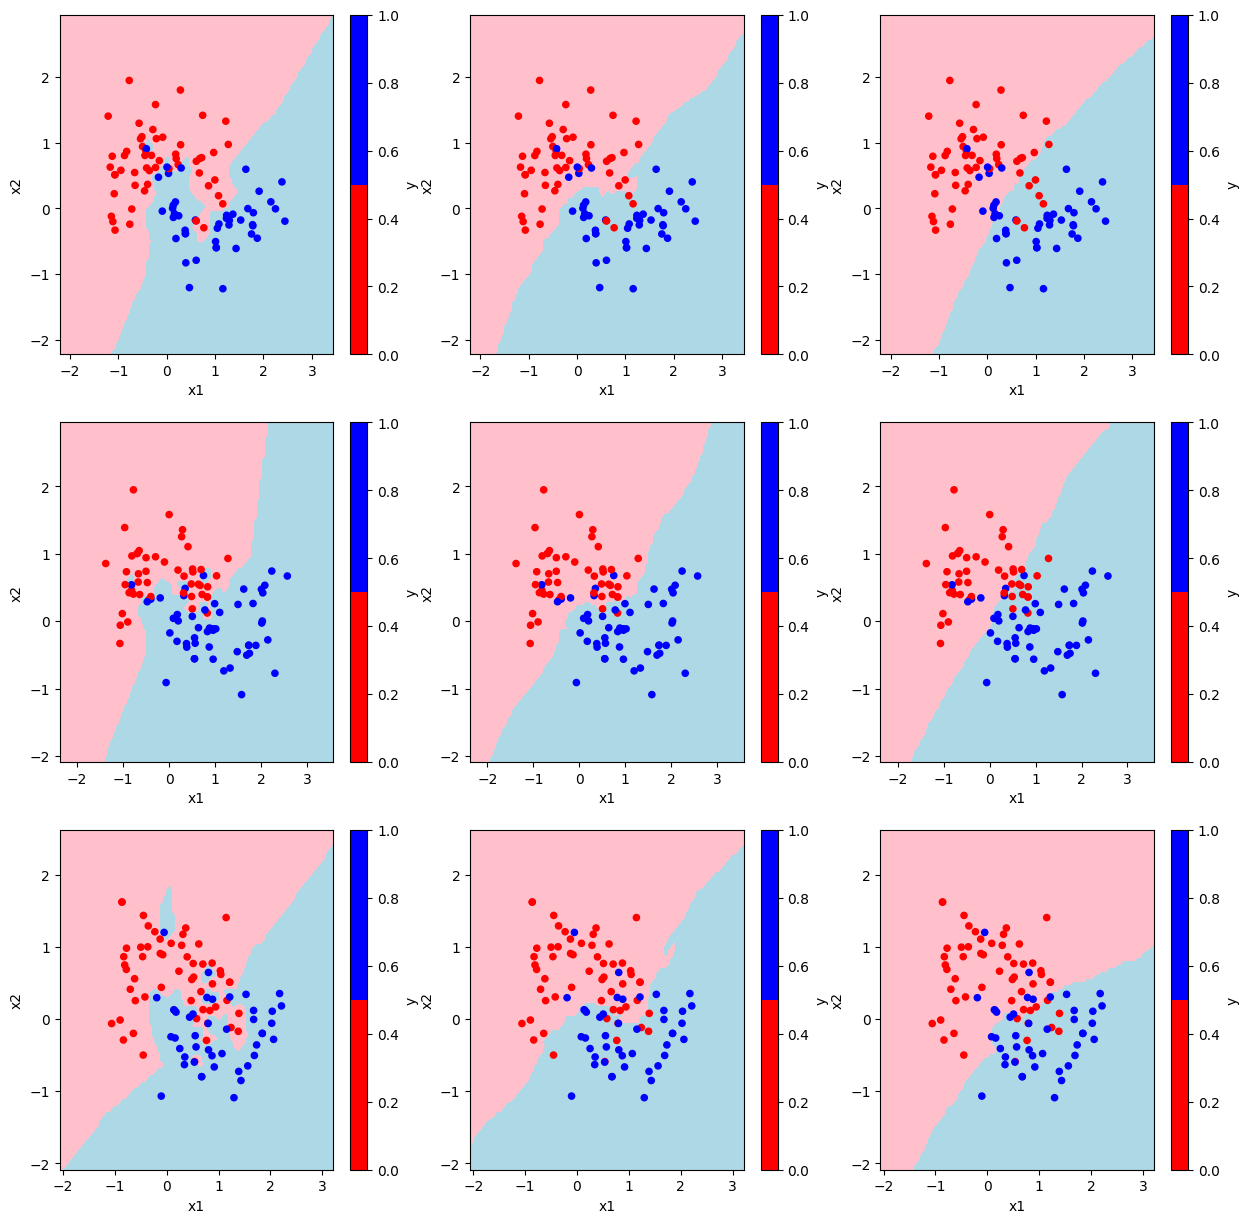

Bad pipe message: %s [b'6eK\xacT_\x97!\x91\xa2\xec\x1c\x11\x14\xf3%\n\xc8\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W', b"\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009\x008\xc0\t\xc0\x13\x003\x002\x00\x9d\xc0\xa1\xc0\x9d\xc0Q\x00\x9c\xc0\xa0\xc0\x9c\xc0P\x00=\x00<\x005\x00/\x00\x9a\x00\x99\xc0\x07\xc0\x11\x00\x96\x00\x05\x00\xff\x01\x00\x00j\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x000\x00.\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01\x03\x03\x02\x03\x03", b'']
Bad pipe message: %s [b'', b'\x02']
Bad pipe message: %s [b'\x05\x02\x06']
Bad pipe message: %s [b"\xc1$od\x1c\xcb{\xf9\xbc\x02\xe7#m\xe2\x0b\x99\x04\x12\x00\x00\xa6\xc0,

In [27]:
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Setting up the subplots
fig, axs = plt.subplots(3, 3, figsize = (15, 15))

# Setting the seed to match part (c)
np.random.seed(0)

for i in range(3):
    indices = np.random.randint(low = 0, high = 1000, size = 100)

    for index2, eachK in enumerate([1, 25, 50]):
        # Fitting and Predicting Classifier
        scikit_classifier = KNeighborsClassifier(n_neighbors = eachK)
        scikit_classifier.fit(X_data[indices, :], Y_data[indices])
        scikit_predictions = scikit_classifier.predict(X_data[indices, :])
        
        # Plotting Decision Boundary
        DecisionBoundaryDisplay.from_estimator(
            scikit_classifier,
            X_data[indices, :],
            response_method='predict',
            cmap=ListedColormap(['pink', 'lightblue']),
            ax=axs[i, index2])
        
        # Plotting Data Points
        pd.DataFrame(
            {'x1': X_data[indices, 0], 
            'x2': X_data[indices, 1], 
            'y': Y_data[indices]}).plot.scatter(
                x = 'x1', 
                y = 'x2', 
                c = 'y', 
                cmap = ListedColormap(['red', 'blue']), 
                ax = axs[i, index2])

plt.show()


**(e)** Comparing the Decision Boundary Plots

Looking across the columns, one would notice that the decision boundary plots capture all of the points accurately on the left, and increasingly make inaccurate predictions moving to the right.  However, even though these samples all come from the same dataset, moving down the rows, it is clear that the decision boundary plots on the left are very different from each other, with some portions of the decision boundary of the same class being disjointed, and deep within the other class's "territory".  Conversely, on the right, moving down the rows, the decision boundaries all appear fairly similar, and although they make more incorrect predictions, they generalize the overall dataset better.  Nevertheless, the plots on the right seem to have very little "moon" shape that we know is in the original dataset, so it is likely that the k = 25 classifier would be the best classifier for this dataset.

**(f)** Bias-Variance Tradeoff

The bias-variance tradeoff can be seen in the above plots, because as discussed, the decision boundary for each sample on the left varies greatly, which means it will not generalize well to other samples.  This is high variance.  As you increase k, from 1 to 25, then to 50, the variance in the samples (moving down the rows) is reduced from plot to plot, but instead the model is increasing its bias, where, the right decision boundary plots are much more similar to each other, but they have a shape that is not very similar to the original dataset.  This is high bias.  In this scenario, it seems the k = 25 classifier may be the best, because it retains some of the shape of the original dataset, but it also varies a bit down the rows, making it less generalizable.  This may be a relatively decent middle ground for the bias-variance tradeoff in this model.

---

## 6
**[18 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise explores the impact of the bias-variance tradeoff on classifier performance by looking at the performance on both training and test data.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function setting the `noise` parameter to 0.35), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of incorrect predictions).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In KNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

**(a)** Creating Test Data

In [29]:
X_test, Y_test = make_moons(n_samples = 1000, noise = .35)

**(b)** Plotting Classification Error against K

In [32]:
K_List = [k for k in range(1, 500)]

Accuracy_Train = [1 - KNeighborsClassifier(
    n_neighbors=k).fit(
        X_data,
        Y_data).score(
            X_data,
            Y_data) for k in K_List]

Accuracy_Test = [1 - KNeighborsClassifier(
    n_neighbors=k).fit(
        X_data,
        Y_data).score(
            X_test,
            Y_test) for k in K_List]

plot_data = pd.DataFrame(
    {'K': K_List, 'Training Accuracy': Accuracy_Train, 'Testing Accuracy': Accuracy_Test})

training_plot = alt.Chart(
    plot_data, title = 'Classification Error in Training Data and Testing Data as dependent on K').mark_line().encode(
        x='K',
        y=alt.Y('Training Accuracy', scale=alt.Scale(zero=False), title = 'Classification Error'),
        color=alt.value('red'))

testing_plot = alt.Chart(
    plot_data).mark_line().encode(
        x='K',
        y=alt.Y('Testing Accuracy', scale=alt.Scale(zero=False), title = 'Classification Error'),
        color=alt.value('blue'))

training_plot + testing_plot


alt.LayerChart(...)

**(c)** Plot Trends

As K increases, the amount of error in the training data is always increasing.  It increases rapidly at first, and then levels off between approximate k values of 50 and 150, and then increases at a relatively steady pace thereafter.  Conversely, as K increases, the amount of error in the test data is dramatically decreasing at first, levels off, and starts increasing again around K = 200.

---

## 7
**[18 points] Linear regression and nonlinear transformations**. Linear regression can be used to model nonlinear relationships when feature variables are properly transformed to represent the nonlinearities in the data. In this exercise, you're given training and test data contained in files "A2_Q7_train.csv" and "A2_Q7_test.csv" in the "data" folder for this assignment. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted. Consider this your baseline model against which you will compare other model options. *Evaluating performance on the training data is not a measure of how well this model would generalize to unseen data. We will evaluate performance on the test data once we see our models fit the training data decently well.*  

**(c)** If features can be nonlinearly transformed, a linear model may incorporate those non-linear feature transformation relationships in the training process. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 z_1 + a_2 z_2 + \ldots + a_n z_n$. Here $z_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $z_1 = x$ and $z_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Visualize the model fit to the training data. Using both of the models you created in parts (b) and (c), plot the original data (as a scatter plot) AND the curves representing your models (each as a separate curve) from (b) and (c).

**(e)** Now its time to compare your models and evaluate the generalization performance on held out test data. Using the models above from (b) an (c), apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? How would the accuracy of generalization performance be impacted? Why?

*To help get you started - here's some code to help you load in the data for this exercise (you'll just need to update the path)*:

In [ ]:
# import numpy as np
# import pandas as pd

# path = './data/'
# train = pd.read_csv(path + 'A2_Q7_train.csv')
# test = pd.read_csv(path + 'A2_Q7_test.csv')

# x_train = train.x.values
# y_train = train.y.values

# x_test = test.x.values
# y_test = test.y.values

**ANSWER**

**(a)** Scatter Plot of Training Data

In [ ]:
# Load Data
train = pd.read_csv('data/A2_Q7_train.csv', index_col=0)
test = pd.read_csv('data/A2_Q7_test.csv', index_col=0)

# Generate Scatter Plot of Training Data
scatter = alt.Chart(
    train, 
    title='Scatter Plot of Training Data').mark_point().encode(
        x='x', y='y')

# Show Scatter Plot
scatter

alt.Chart(...)

**(b)** Linear Regression of Training Data

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_model = LinearRegression()
train_x = train.loc[:, 'x'].to_numpy().reshape(-1, 1)
train_y = train.loc[:, 'y'].to_numpy().reshape(-1, 1)
predictor = train.loc[:, 'x'].name
linear_model.fit(train_x, train_y)
linear_predictions = linear_model.predict(train_x)

print(f"""The linear regression model that estimates this training data set is \
{linear_model.intercept_[0]: .2f} + {linear_model.coef_.tolist()[0][0]: .2f} {predictor}.
The r-squared value of the linear regression model is {linear_model.score(train_x, train_y): .2f} and its MSE is \
{mean_squared_error(train_y, linear_predictions): .2f}.""")


The linear regression model that estimates this training data set is  17.20 +  2.59 x.
The r-squared value of the linear regression model is  0.06 and its MSE is  791.42.


**(c)** Non-linear Transformation Regression

In [ ]:
nonLinear_transformation = LinearRegression()
nonLinear_predictors = np.vstack((train.loc[:, 'x'].to_numpy(), train.loc[:, 'x'] ** 3)).T
nonLinear_names = [train.loc[:, 'x'].name, f"{train.loc[:, 'x'].name}^3"]
nonLinear_transformation.fit(nonLinear_predictors, train_y)
nonLinear_predictions = nonLinear_transformation.predict(nonLinear_predictors)

print(f"""The non-linear regression model that estimates this training data set is \
{nonLinear_transformation.intercept_[0]: .2f} + {nonLinear_transformation.coef_.tolist()[0][0]: .2f} {nonLinear_names[0]} + \
{nonLinear_transformation.coef_.tolist()[0][1]: .2f} {nonLinear_names[1]}.
The r-squared value of the non-linear regression model is {nonLinear_transformation.score(nonLinear_predictors, train_y): .2f} and \
its MSE is {mean_squared_error(train_y, nonLinear_predictions): .2f}.""")

The non-linear regression model that estimates this training data set is  12.39 + -5.58 x +  0.47 x^3.
The r-squared value of the non-linear regression model is  0.28 and its MSE is  609.78.


**(d)** Plotting Regressions

In [ ]:
linear_model_plot = alt.Chart(
    pd.concat(
        (train.loc[:, 'x'],
         pd.Series(
            linear_model.predict(
                train_x).reshape(1, -1)[0],
            name='y_hat')),
        axis=1)).mark_line().encode(x='x', y='y_hat')
        
nonLinear_model_plot = alt.Chart(
    pd.concat(
        (train.loc[:, 'x'],
         pd.Series(
            nonLinear_transformation.predict(
                nonLinear_predictors).reshape(1, -1)[0],
            name='y_hat')),
        axis=1)).mark_line().encode(x='x', y='y_hat')

scatter + linear_model_plot + nonLinear_model_plot


alt.LayerChart(...)

**(e)** Analyzing Metrics of the Models on the Test Data

In [ ]:
test_x = test.loc[:, 'x'].to_numpy().reshape(-1, 1)
test_y = test.loc[:, 'y'].to_numpy().reshape(-1, 1)

nonLinear_test = np.vstack(
    (test.loc[:, 'x'].to_numpy(), 
    test.loc[:, 'x'] ** 3)).T

linear_test_predictions = linear_model.predict(test_x)
nonLinear_test_predictions = nonLinear_transformation.predict(nonLinear_test)

print(f"""The r-squared of the linear model on the test set is {linear_model.score(test_x, test_y): .2f} and the MSE of the linear \
model on the test set is{mean_squared_error(test_y, linear_test_predictions): .2f}.  
The r-squared of the non-linear model on the test set is {nonLinear_transformation.score(nonLinear_test, test_y): .2f} and the MSE \
of the non-linear model on the test data is {mean_squared_error(test_y, nonLinear_test_predictions): .2f}.""")


The r-squared of the linear model on the test set is -0.13 and the MSE of the linear model on the test set is 1116.66.  
The r-squared of the non-linear model on the test set is  0.12 and the MSE of the non-linear model on the test data is  870.28.


**(f)** Comparing the Models

The models with the non-linear transformations of the predictors perform better on both the training and testing dataset.  This is likely due to the fact that the population data is non-linear.

**(g)** Understanding Test Data

If test data is significantly different from training data (or said differently, if the training data is not representative of the test data), the model will not be accurate in its predictions of the test data.  The ability of a model to generalize on test data, or any data outside of the training data, is based upon the assumption that training data is representative of the testing data.  Therefore, the accuracy of generalization performance will decline as test data is significantly different from training data.  A model is designed to predict data based on the training data, and cannot predict data that is very different from the training data.